# Ce projet consiste à faire de la classification en utilisant le descripteur **SIFT**



1.   Dans un 1er temps, nous avons structuré notre dataset en 2 avec les données d'entrainement appelées ici train et les données de test appelées ici test
2.   Le principe étant de calculer le descripteur SIFT de tous nos images d'entrainement

2.   Choisir aléatoirement une image de test et calculer son descripteur SIFT

1.   Faire du matching entre notre descripteur de test et les descripteurs de nos images d'entrainement en utilisant le 2e plus proche voisin
2.   Pofiner le matching en utilisant la similitude au lieu de la distance pour éliminer les erreurs

1.   Faire la classification en utilisant les plus proches voisins ayant une similitude plus importante.


# Notre dataset a été subdivisé en 80% pour le jeu d'entrainement (58 images) par classe et 20% pour le test (14 images) par classe

# Notre dataset vient de Columbia University Image Library (COIL-100) donc voilà le lien https://www1.cs.columbia.edu/CAVE/software/softlib/coil-100.php

In [1]:
# Importation des différentes librairies devant permettre la réalisation de notre projet
import glob
import cv2
import numpy as np
import os
%matplotlib inline
from matplotlib import pyplot as plt
import natsort
import random
from collections import OrderedDict
import pickle
import shutil


# Téléchargement de notre dataset

In [2]:
# Télécharge notre dataset à partir de du drive en utilisant le lien de téléchargement et le dataset est public
!gdown --id 1PUO-kUDLgBBS99E9EycZy3SqiyaZa12q

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1PUO-kUDLgBBS99E9EycZy3SqiyaZa12q
To: /content/coil-100.zip
100% 131M/131M [00:01<00:00, 106MB/s]


In [3]:
# Suprrimer le repertoire 
!sudo rm -r /content/coil-100

rm: cannot remove '/content/coil-100': No such file or directory


# Désarchivage de notre dataset nommé coil-1OO
# Suppression de l'archive 

In [4]:
# dézipper le fichier
!unzip coil-100.zip
# Supprimer le fichier zippé
!rm -r /content/coil-100.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: coil-100/obj26__250.png  
  inflating: coil-100/obj26__255.png  
  inflating: coil-100/obj26__300.png  
  inflating: coil-100/obj26__330.png  
  inflating: coil-100/obj26__335.png  
  inflating: coil-100/obj27__10.png  
  inflating: coil-100/obj27__105.png  
  inflating: coil-100/obj27__120.png  
  inflating: coil-100/obj27__15.png  
  inflating: coil-100/obj27__20.png  
  inflating: coil-100/obj27__205.png  
  inflating: coil-100/obj27__230.png  
  inflating: coil-100/obj27__280.png  
  inflating: coil-100/obj27__35.png  
  inflating: coil-100/obj27__355.png  
  inflating: coil-100/obj27__75.png  
  inflating: coil-100/obj27__80.png  
  inflating: coil-100/obj28__0.png   
  inflating: coil-100/obj28__10.png  
  inflating: coil-100/obj28__135.png  
  inflating: coil-100/obj28__140.png  
  inflating: coil-100/obj28__165.png  
  inflating: coil-100/obj28__215.png  
  inflating: coil-100/obj28__225.

# Fonction permettant de:
# *   Créer notre jeu de données d'entrainement de manière automatique et alélatoire
# *   Créer notre jeu de données test de manière automatique et aléatoire
# *   Créer un dossier devant contenir nos modèles pour le test. Ici dans ce TP, il s'agit du descripteur SIFT





In [ ]:

def creer_train_test(chemin, separation):
  liste = []
  # Lecture de noms de fichiers images
  src_files = os.listdir(chemin)
  # Classer ces noms de fichiers dans l'ordre croissant
  src_file = natsort.natsorted(src_files)
  # Séparation des noms de fichiers en 2 de notre 1er nom de fichier dans la liste de nom de fichiers d'images
  name1, name2 = src_file[0].split('__')
  # Variable liste permettant de chaque classe d'images
  L = []
  # L.append(src_file[0])

  # Création d'un repertoire devant contenir les images de test
  directory1 = "test"
  path1 = os.path.join(chemin, directory1)
  os.mkdir(path1)
  # print(path1)
  
  # Création d'un repertoire devant contenir les images d'entrainement
  directory2 = "train"
  path2 = os.path.join(chemin, directory2)
  os.mkdir(path2)

  # Création d'un repertoire devant contenir les modèles de descripteurs de SIFT
  directory3 = "modele"
  path3 = os.path.join(chemin, directory3)
  os.mkdir(path3)

  # Parcour chaque de liste de noms de fichiers d'images triées
  for i, res in enumerate(src_file):
      name3, name4 = res.split('__')
      # Vérifie s'ils sont de la mème classe
      if name1 == name3:
          # Ajoute le nom de fichier dans la liste L s'il est de la classe
          L.append(res)
          name1, name2 = res.split('__')
      else:# S'ils ne sont pas de la mème classe
          # print(L)
          # On divide le test en 20%
          taille_test = int(len(L)*separation)
          # Les données de train vont contenir 80%
          taille_train = len(L) - taille_test
          # liste_valeur_test = [i for i in range(14)]
          # Variable devant contenir les noms d'images de test
          liste_test = []
          # Le compteur
          k = 0

          while k < taille_test: # S'assure qu'on ne dépasse pas les 20%
              rand = random.randint(0, len(L)-1) # Choisir un nom au hasard
              liste_test.append(L[rand]) # Mets ce nom dans la liste de noms d'images test
              L.remove(L[rand]) # Supprime ce nom de la liste
              k += 1
          
          # Déplace les images dans le dossier test
          for file_name in liste_test:
              # img = os.path.join(path1, file_name)
              shutil.move(chemin + '/'+ file_name, path1 + '/' + file_name)

          # Déplaace les images dans le dossier train
          for file_name in L:
              # img = os.path.join(path1, file_name)
              shutil.move(chemin + '/'+ file_name, path2 + '/' + file_name)
          
          # Reitialise la liste afin de commencer une autre classe
          L = []
          L.append(res)
          name1, name2 = res.split('__')

  # Réfaire le meme processus pour la dernière classe restante
  taille_test = int(len(L)*separation)
  taille_train = len(L) - taille_test
  # liste_valeur_test = [i for i in range(14)]
  liste_test = []
  k = 0
  while k < taille_test:
      rand = random.randint(0, len(L)-1)
      liste_test.append(L[rand])
      L.remove(L[rand])
      k += 1
  # print(liste_test)
  for file_name in liste_test:
      # img = os.path.join(path1, file_name)
      shutil.move(chemin + '/'+ file_name, path1 + '/' + file_name)
      
  for file_name in L:
      # img = os.path.join(path1, file_name)
      shutil.move(chemin + '/'+ file_name, path2 + '/' + file_name)
  return taille_train, taille_test

# Chemin d'accès au dataset
chemin = '/content/coil-100'

# Appel de la fonction de création de train, test, et le dossier modèle
taille_train, taille_test = creer_train_test(chemin, 0.5)

In [ ]:
cheminImage = "/content/coil-100/train"

# Chemin d'accès au dataset d'entrainement

# Fonction permettant de lire les images d'entrainement dans un ordre croissant





In [ ]:

def acquisitionImage(chemin):
    liste = []
    # Lecture de noms de fichiers images
    src_files = os.listdir(chemin)
    # Classer ces noms de fichiers dans l'ordre croissant
    src_file = natsort.natsorted(src_files)
    # print(src_file[5477])
    for file_name in src_file:
      # Accès aux différents images de notre jeu de données d'entrainement
      img = os.path.join(chemin, file_name)
      # Lecture de chaque image de notre jeu de données d'entrainement
      im = cv2.imread(str(img))
      image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) ## Mets les images en RGB
      liste.append(image)# Charge chaque image dans la liste
    return np.array(liste) ## Retourne une  type de données nommé numpy contenant tout non image et facile à traiter que les listes

# Appel de la fonction de lecture d'images d'entrainement
listImage = acquisitionImage(cheminImage)

# Affichage de quelques images d'entrainement de manière aléatoire ainsi  que leur voisin

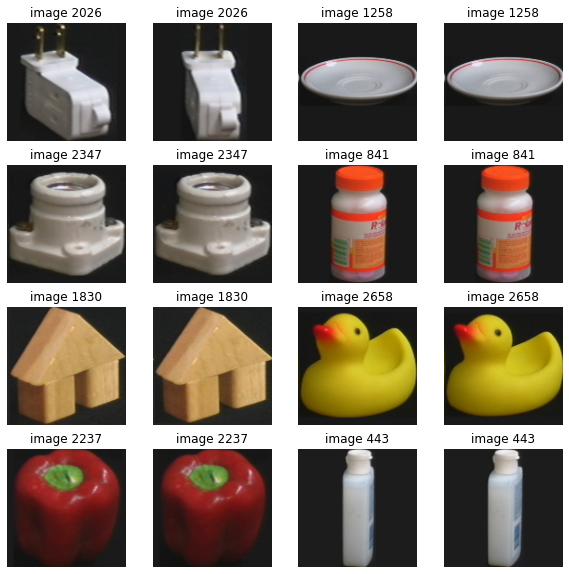

In [ ]:
plt.figure(figsize=(10, 10))
for k, i in np.ndenumerate(np.random.randint(listImage.shape[0], size=8)):
    ax = plt.subplot(4, 4, 2 * k[0] + 1)
    plt.imshow(listImage[i], cmap='gray')
    plt.title('image {}'.format(i))
    plt.axis("off")
    x = plt.subplot(4, 4, 2 * k[0] + 2)
    plt.imshow(listImage[i+1], cmap='gray')
    plt.title('image {}'.format(i))
    plt.axis("off")

# Calcul du descripteur SIFT de chaque image de notre jeu d'entrainement
# Creation de fichiers dans le dossier modèle contenant chacun le descripteur SIFT de chaque image de notre jeu d'entrainement

In [ ]:
def clacul_descripteur_sift(listImage):
  # Variable k permet de définir la classe où nous trouvons
  k = 1
  # Creation de l'objet sift
  sift = cv2.SIFT_create()
  # La variable compt permet de choisir une image de la classe k de notre jeu d'entrainement
  compt = 1
  # Liste contenant les descripteurs
  listeDescripteur = []
  listeClasse = []
  # Parcourir les images de notre jeu de données d'entrainement
  for i, im in enumerate(listImage):
    # print(i)
    #j = (i+1) % 58
    # Parcourir tous les éléments d'une classe
    if compt <= taille_train:
      # Création et ouverture du fichier modèle devant contenir les descripteurs
      f = open("/content/coil-100/modele/noesis.sadi"+ '_' + str(k) + '_' +str(compt), 'wb')
      img1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
      # Détection des points d'intérèts et des descripteurs de points d'intérèts 
      keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
        #print(descriptors_1)
        # print(k)
        # print(compt)
        # print(descriptors_1.shape)
      listeDescripteur.append(descriptors_1)
      listeClasse.append(k)
      # Sauvegarde des descripteurs en utilisant la librairies pickle 
      # qui permet de sauver tout en gardant le type de l'objet
      pickle.dump(descriptors_1,f)
      # Fermer le fichier
      f.close()
      # Passer à l'image suivante de la classe
      compt += 1
    else: # Passage de la classe suivante quand tous les images de la classe précédente ont été prises
      # Reinitialise pour avoir la 1ère image de la classe suivante
      compt = 1
      # Passage à la classe suivante
      k += 1
      f = open("/content/coil-100/modele/noesis.sadi"+ '_' + str(k) + '_' +str(compt), 'wb')
      img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
      keypoints, descriptors = sift.detectAndCompute(img,None)
      listeDescripteur.append(descriptors)
      listeClasse.append(k)
      # print(descriptors)
      pickle.dump(descriptors,f)
      f.close()
      compt += 1
  return listeDescripteur, listeClasse

# Appel de la fonction
listeDescripteur, listeClasse = clacul_descripteur_sift(listImage)

# Récupération de nos descripteurs contenus dans les fichiers 

In [ ]:
## Fonction permettant d'acquerir de test
chemin_modele = '/content/coil-100/modele'
def acquisitionModele(chemin):
    liste = []
    src_files = os.listdir(chemin)
    src_file = natsort.natsorted(src_files)
    # print(src_file[1973])
    for file_name in src_file:
      chemin_fichier = os.path.join(chemin, file_name)
      ouverture_fichier = open(chemin_fichier,mode='rb')
      # Lire le contenu de fichier sauvé précédemment avec la librairie pickle
      # tout en conservant le type de l'objet 
      fichier = pickle.load(ouverture_fichier)
      # print(fichier)
      # close the file
      ouverture_fichier.close()
      # print(type(fichier))
      liste.append(fichier)
    return np.array(liste) ## Retourne une matrice de plusieurs descripteurs

## Appel de la fonction
liste_des = acquisitionModele(chemin_modele)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
cheminImageTest = "/content/coil-100/test"
## Fonction permettant d'acquerir des images test 
def acquisitionImage(chemin):
    liste = []
    src_files = os.listdir(chemin)
    src_file = natsort.natsorted(src_files)
    # print(src_file)
    for file_name in src_file:
      img = os.path.join(chemin, file_name)
      im = cv2.imread(str(img))
      image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) ## Mets les images en RGB
      liste.append(image)
    return np.array(liste) ## Retourne une matrice de plusieurs dimensions d'images

## Appel de la fonction
listImageTest = acquisitionImage(cheminImageTest)

In [ ]:
print(len(listImageTest))

3600


# Affichage d'une image test de manière aléatoire

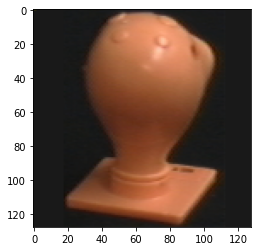

In [ ]:
# imageTest = random.choice(listImageTest)
# Choisir l'indice d'une image test au hasard
random_index = random.randrange(len(listImageTest))
# Récupération de l'image
imageTest = listImageTest[random_index]
# Affichage de l'image
plt.imshow(imageTest, cmap='gray')

# Détermination de la classe de l'image choisir de manière aléatoire




In [ ]:
# Comme il y a 14 image test par classe d'ou cette division entière
classe = (random_index + 1) // taille_test 
# Calcule le reste de la division 
r = (random_index + 1) % taille_test
if r != 0: # Permet de si on a récupérer la dernière image d'une classe
  classe += 1 # Passe à la classe suivante si la division n'est pas entière
print(classe)

20


# Affichage la prédiction du résultat attendu

706


Text(0.5, 1.0, 'Image attendue 20')

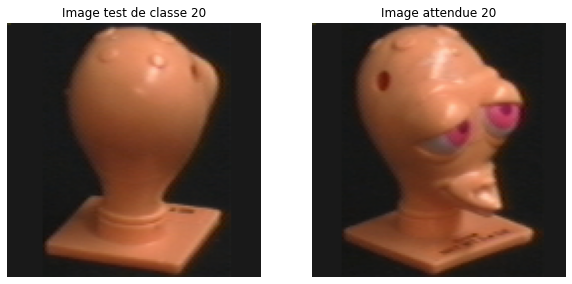

In [ ]:
fig = plt.figure(figsize=(10,10))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(imageTest)
plt.axis('off')
plt.title("Image test de classe {}".format(classe))
fig.add_subplot(rows, columns, 2)
print((classe-1)*taille_train+random.randint(1, taille_train))
plt.imshow(listImage[(classe-1)*taille_train+random.randint(1, taille_train)])
plt.axis('off')
plt.title("Image attendue {}".format(classe))

# Calcul du descripteur de l'image test afin de trouver la classe de l'image test

In [ ]:
sift1 = cv2.SIFT_create()
kpt, des = sift1.detectAndCompute(imageTest,None)

# Fonction pour afficher tous les descripteurs de nos images de test

In [ ]:
def afficher_desc(listImageTest):
  sift1 = cv2.SIFT_create()
  liste_test_des = []
  for im in listImageTest:
    kpt, des = sift1.detectAndCompute(im,None)
    liste_test_des.append(des)
  return np.array(liste_test_des) 

liste_test_des = afficher_desc(listImageTest) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


# Faire le matching entre le descripteur de l'image test et ceux du jeu d'entrainement
# Classer les classes en fonction des meilleurs scores
# Le seuil ici permet d'évaluer la similarité entre 2 voisins

In [ ]:
def matching_test_train(des, liste_des, seuil):
  # Instantion de l'objet matching
  bf = cv2.BFMatcher()
  # Variable de parcours les éléments de la classe
  elt_classe = 1
  # Variable qui indique la classe
  clas = 1
  # Variable qui indique la classe et son élément
  cle = []
  # Variable qui indique la valeur de similarité
  valeur = []
  for j, descrip in enumerate(liste_des):
    # print(j)
    if elt_classe <= taille_train:
      # Matching avec les 2 plus proches voisins 
      # print(j)
      matches = bf.knnMatch(des,descrip, k=2)
      # print(len(matches))
      good = []
      for m,n in matches:
        if m.distance < seuil*n.distance: # Matching avec similarité 
          good.append([m])
        # Calcul du score en se basant sur la correspondance réussite et les descripteurs détectés
      score = len(good)/len(matches)*100
        # print(score)
      chaine = str(clas)+' '+str(elt_classe)
      cle.append(chaine)
      valeur.append(score)
      elt_classe += 1
    else:
      clas += 1
      elt_classe = 1
      matches = bf.knnMatch(des,descrip, k=2)
      # print(len(matches))
      good = []
      for m,n in matches:
        if m.distance < seuil*n.distance:
          good.append([m])
      score = len(good)/len(matches)*100
      # print(score)
      chaine = str(clas)+' '+str(elt_classe)
      cle.append(chaine)
      valeur.append(score)
      elt_classe += 1
  dico = dict(zip(cle, valeur))
  return sorted(dico.items(), key=lambda x: x[1], reverse=True)


# Appel de la fonction de matching
dico = matching_test_train(des, liste_des, 0.7)

In [ ]:
print(dico)

[('20 21', 83.33333333333334), ('20 22', 58.333333333333336), ('20 23', 50.0), ('20 24', 41.66666666666667), ('57 10', 37.5), ('95 16', 37.5), ('95 22', 37.5), ('95 30', 37.5), ('57 16', 33.33333333333333), ('95 24', 33.33333333333333), ('12 24', 29.166666666666668), ('36 28', 29.166666666666668), ('46 32', 29.166666666666668), ('47 25', 29.166666666666668), ('89 17', 29.166666666666668), ('95 23', 29.166666666666668), ('97 29', 29.166666666666668), ('2 11', 25.0), ('17 19', 25.0), ('18 8', 25.0), ('20 11', 25.0), ('20 12', 25.0), ('20 25', 25.0), ('20 28', 25.0), ('21 2', 25.0), ('23 16', 25.0), ('36 29', 25.0), ('36 30', 25.0), ('42 3', 25.0), ('48 2', 25.0), ('55 19', 25.0), ('71 16', 25.0), ('74 22', 25.0), ('82 29', 25.0), ('95 2', 25.0), ('95 3', 25.0), ('95 7', 25.0), ('95 9', 25.0), ('95 11', 25.0), ('95 33', 25.0), ('97 2', 25.0), ('2 9', 20.833333333333336), ('2 17', 20.833333333333336), ('2 21', 20.833333333333336), ('2 28', 20.833333333333336), ('3 17', 20.833333333333336),

# Classification des images en tenant compte de la similarité 
# Cette classification utilise les K voisins 

In [ ]:

def classification_object(dictionaire, k):
  # Variable pour éviter de prendre plus de k élément dans le dictionnaire
  nombre = 0
  # Variable devant contenir la liste des k classes 
  liste = []
  for key in dictionaire:
    # print(key)
    # Récupération de la classe, l'image de la classe et la valeur de similarité
    (clas, valeur) = key
    # Séparation de la classe et l'image de la classe
    classe, position = clas.split(' ')
    classe = int(classe)
    liste.append(classe)
    nombre += 1
    if nombre == k: # Si le nombre de voisin voulu est atteint on sort de la boucle
      break
  return liste

def choix_classe(liste_classe): # choix de la classe
  max = 0 # Variariable devant contenir la classe ayant le plus d'élément
  max_classe = 0 # Variable contenat la classe
  # res = [*set(liste_classe)]
  res = list(OrderedDict.fromkeys(liste_classe)) # Ordonner la liste sans répétition d'éléments tout en gardant l'ordre d'apparition
  # print(res)
  for j in res:
    if max < liste_classe.count(j): # Choix le nombre d'apparition max de la classe
      max = liste_classe.count(j) # Modifie la valeur de la classe
      max_classe = j
  return max_classe

In [ ]:
## Appel de la fonction 
list_classe = classification_object(dico, 10)
print(list_classe)

[20, 20, 20, 20, 57, 95, 95, 95, 57, 95]


In [ ]:
# Appel de la fonction pour déterminer la classe
classe_obtenue = choix_classe(list_classe)
print(classe_obtenue)

20


Text(0.5, 1.0, 'Image obtenue est de classe 20')

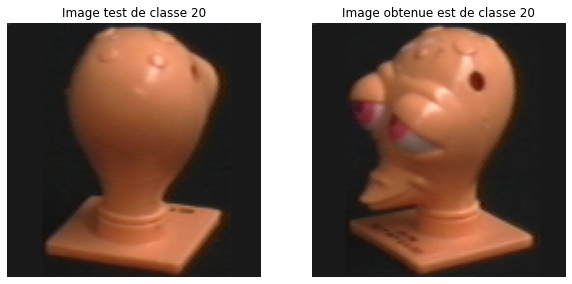

In [ ]:
# Affichage du résultat obtenu
image_resultat = listImage[(classe_obtenue-1)*taille_train+random.randint(1, taille_train)]
fig = plt.figure(figsize=(10,10))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(imageTest)
plt.axis('off')
plt.title("Image test de classe {}".format(classe))
fig.add_subplot(rows, columns, 2)
plt.imshow(image_resultat)
plt.axis('off')
plt.title("Image obtenue est de classe {}".format(classe_obtenue))

# Cette session permet de ressortir les valeurs vraies de motre modèle
# Le résultat attendu

In [ ]:
def determination_classe_vrai(liste_test_des, taille_test):
  lab_vrai = [] # Représente la liste des valeurs vraies de notre modèle ie l'image appartient réellement à la classe
  compt = 1 # Variable qui permet de parcourir chaque image de nos données test
  c = 1    # Variable représentant la classe
  for i in range(len(liste_test_des)):
    if compt <= taille_test:
      lab_vrai.append("object"+str(c)) 
      compt += 1
    else:
      c += 1
      compt = 1
      lab_vrai.append("object"+str(c))
      compt += 1
  return c, lab_vrai

clas, lab_vrai = determination_classe_vrai(liste_test_des, taille_test)
# print(len(lab_vrai))

# Cette section consiste à prédire toutes images tests de votre modèle à fin de voir si notre modèle est performant ou pas

In [ ]:
def tablo_matric_confu(liste_test_des, liste_des, seuil, k):
  # matrice = []
  compt = 1
  c = 1
  l = []
  for d in liste_test_des:
    if compt <= taille_test:
      dic = matching_test_train(d, liste_des, seuil) # Voire fonction plus haut
      list_clas = classification_object(dic, k) # voire fonction plus haut
      classe_obt = choix_classe(list_clas)      # voire fonction plus haut
      l.append("object"+str(classe_obt))        # Prédire la classe de l'image test
      compt += 1
    else:
      c += 1
      compt = 1
      # matrice.append(l)
      # l = []
      dic = matching_test_train(d, liste_des, seuil)
      list_clas = classification_object(dic, k)
      classe_obt = choix_classe(list_clas)
      l.append("object"+str(classe_obt))
      compt += 1
  return l


# Détermination de la matrice de confusion de notre modèle pour apprécier notre modèle afin d'observer les erreurs

In [ ]:
array_list = tablo_matric_confu(liste_test_des, liste_des, 0.75, 10)  # Appel de la fonction de prédiction

In [ ]:
print(len(array_list))

3600


# Détermination de la matrice de confusion avec la librairie sklearn

In [ ]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(array_list , lab_vrai)
cm

array([[36,  0,  0, ...,  1,  0,  0],
       [ 0, 36,  0, ...,  1,  0,  0],
       [ 0,  0, 29, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 23,  0,  0],
       [ 0,  0,  0, ...,  0, 36,  0],
       [ 0,  0,  0, ...,  0,  0, 25]])

In [ ]:
label = ['object'+str(i+1) for i in range(clas)]

In [ ]:
print(label)

['object1', 'object2', 'object3', 'object4', 'object5', 'object6', 'object7', 'object8', 'object9', 'object10', 'object11', 'object12', 'object13', 'object14', 'object15', 'object16', 'object17', 'object18', 'object19', 'object20', 'object21', 'object22', 'object23', 'object24', 'object25', 'object26', 'object27', 'object28', 'object29', 'object30', 'object31', 'object32', 'object33', 'object34', 'object35', 'object36', 'object37', 'object38', 'object39', 'object40', 'object41', 'object42', 'object43', 'object44', 'object45', 'object46', 'object47', 'object48', 'object49', 'object50', 'object51', 'object52', 'object53', 'object54', 'object55', 'object56', 'object57', 'object58', 'object59', 'object60', 'object61', 'object62', 'object63', 'object64', 'object65', 'object66', 'object67', 'object68', 'object69', 'object70', 'object71', 'object72', 'object73', 'object74', 'object75', 'object76', 'object77', 'object78', 'object79', 'object80', 'object81', 'object82', 'object83', 'object84', 

# Affichage des scores de notre modèle en tenant compte des classes moins performantes et en ne leur tenant pas en compte

In [ ]:
class_non = []
valeur = []
som1 = 0
som2 = 0
comp = 0
for i in range(len(cm)):
  for j in range(len(cm[0])):
    if i == j:
      # print(cm[i][j])
      som1 += cm[i][j]/taille_test * 100
      if cm[i][j]/taille_test*100 >= 75:
        som2 += cm[i][j]/taille_test * 100
      else:
        class_non.append('object'+str(i+1))
        valeur.append(cm[i][j])
        comp += 1


print('Le score de notre modèle est de '+str(som1/len(label)))
print('Le score de notre modèle en éliminant les classe qui non pas un score de 75% est de :'+str(som2/(len(label)-comp)))

Le score de notre modèle est de 87.33333333333334
Le score de notre modèle en éliminant les classe qui non pas un score de 75% est de :91.66666666666666


# Affichage des classes ayant un score inférieur à 75% et leur nombre

In [ ]:
print('Les classes ayant un score inférieur à 75% sont:')
print(dict(zip(class_non, valeur)))

Les classes ayant un score inférieur à 75% sont:
{'object4': 21, 'object14': 21, 'object15': 24, 'object16': 26, 'object17': 26, 'object33': 22, 'object38': 23, 'object48': 22, 'object54': 25, 'object74': 18, 'object80': 12, 'object82': 18, 'object98': 23, 'object100': 25}


In [ ]:
print('Le nombre de classes ayant un score inférieur à 75% est de :'+str(len(dict(zip(class_non, valeur)))))

Le nombre de classes ayant un score inférieur à 75% est de :14


# Calcul de la matrice de confusion pour l'évaluation de notre modèle
# avec l'utilisation de la librairie sklearn

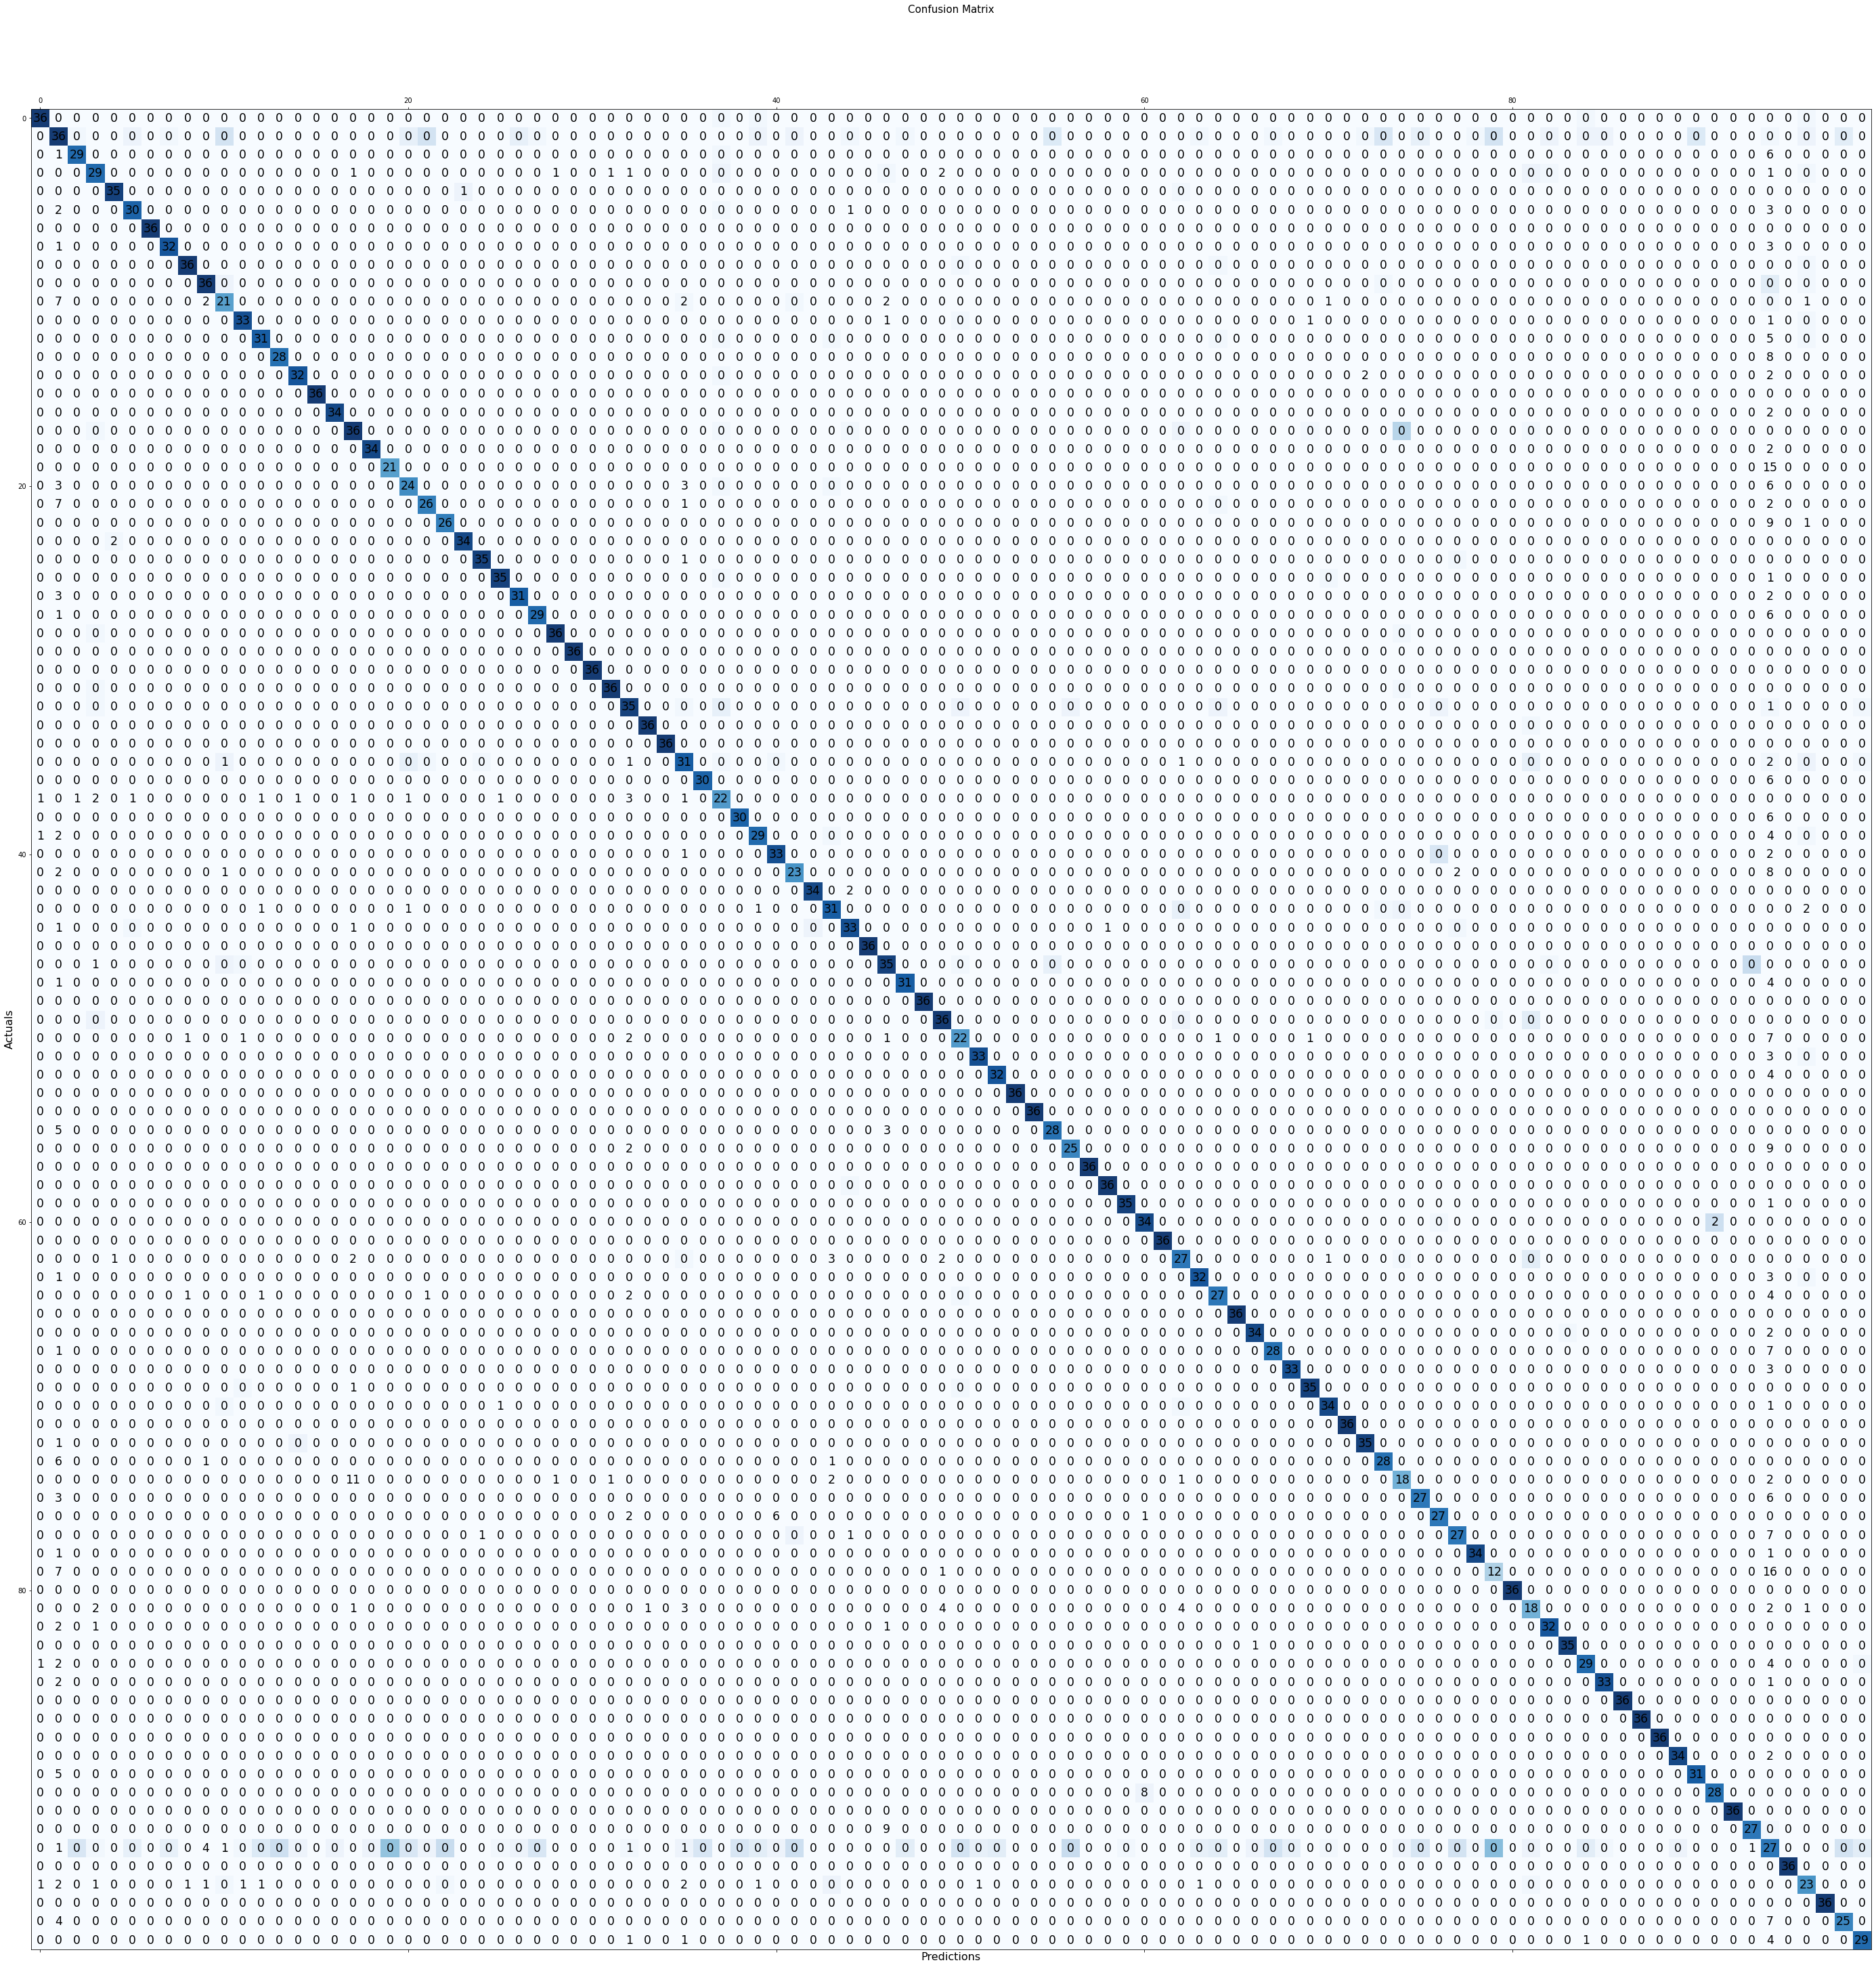

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Calcul de la matrice de confusion
mat_con = (confusion_matrix(array_list ,lab_vrai, labels=label))

# Paramètrage des attributs
fig, px = plt.subplots(figsize=(50, 50))
px.matshow(mat_con, cmap=plt.cm.Blues, alpha=0.95)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[m, n], va='center', ha='center', size='xx-large')

# Mise à jour des étiquettes
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# Affichage de la matrice de confusion de toutes les classes avec la librairie seaborn

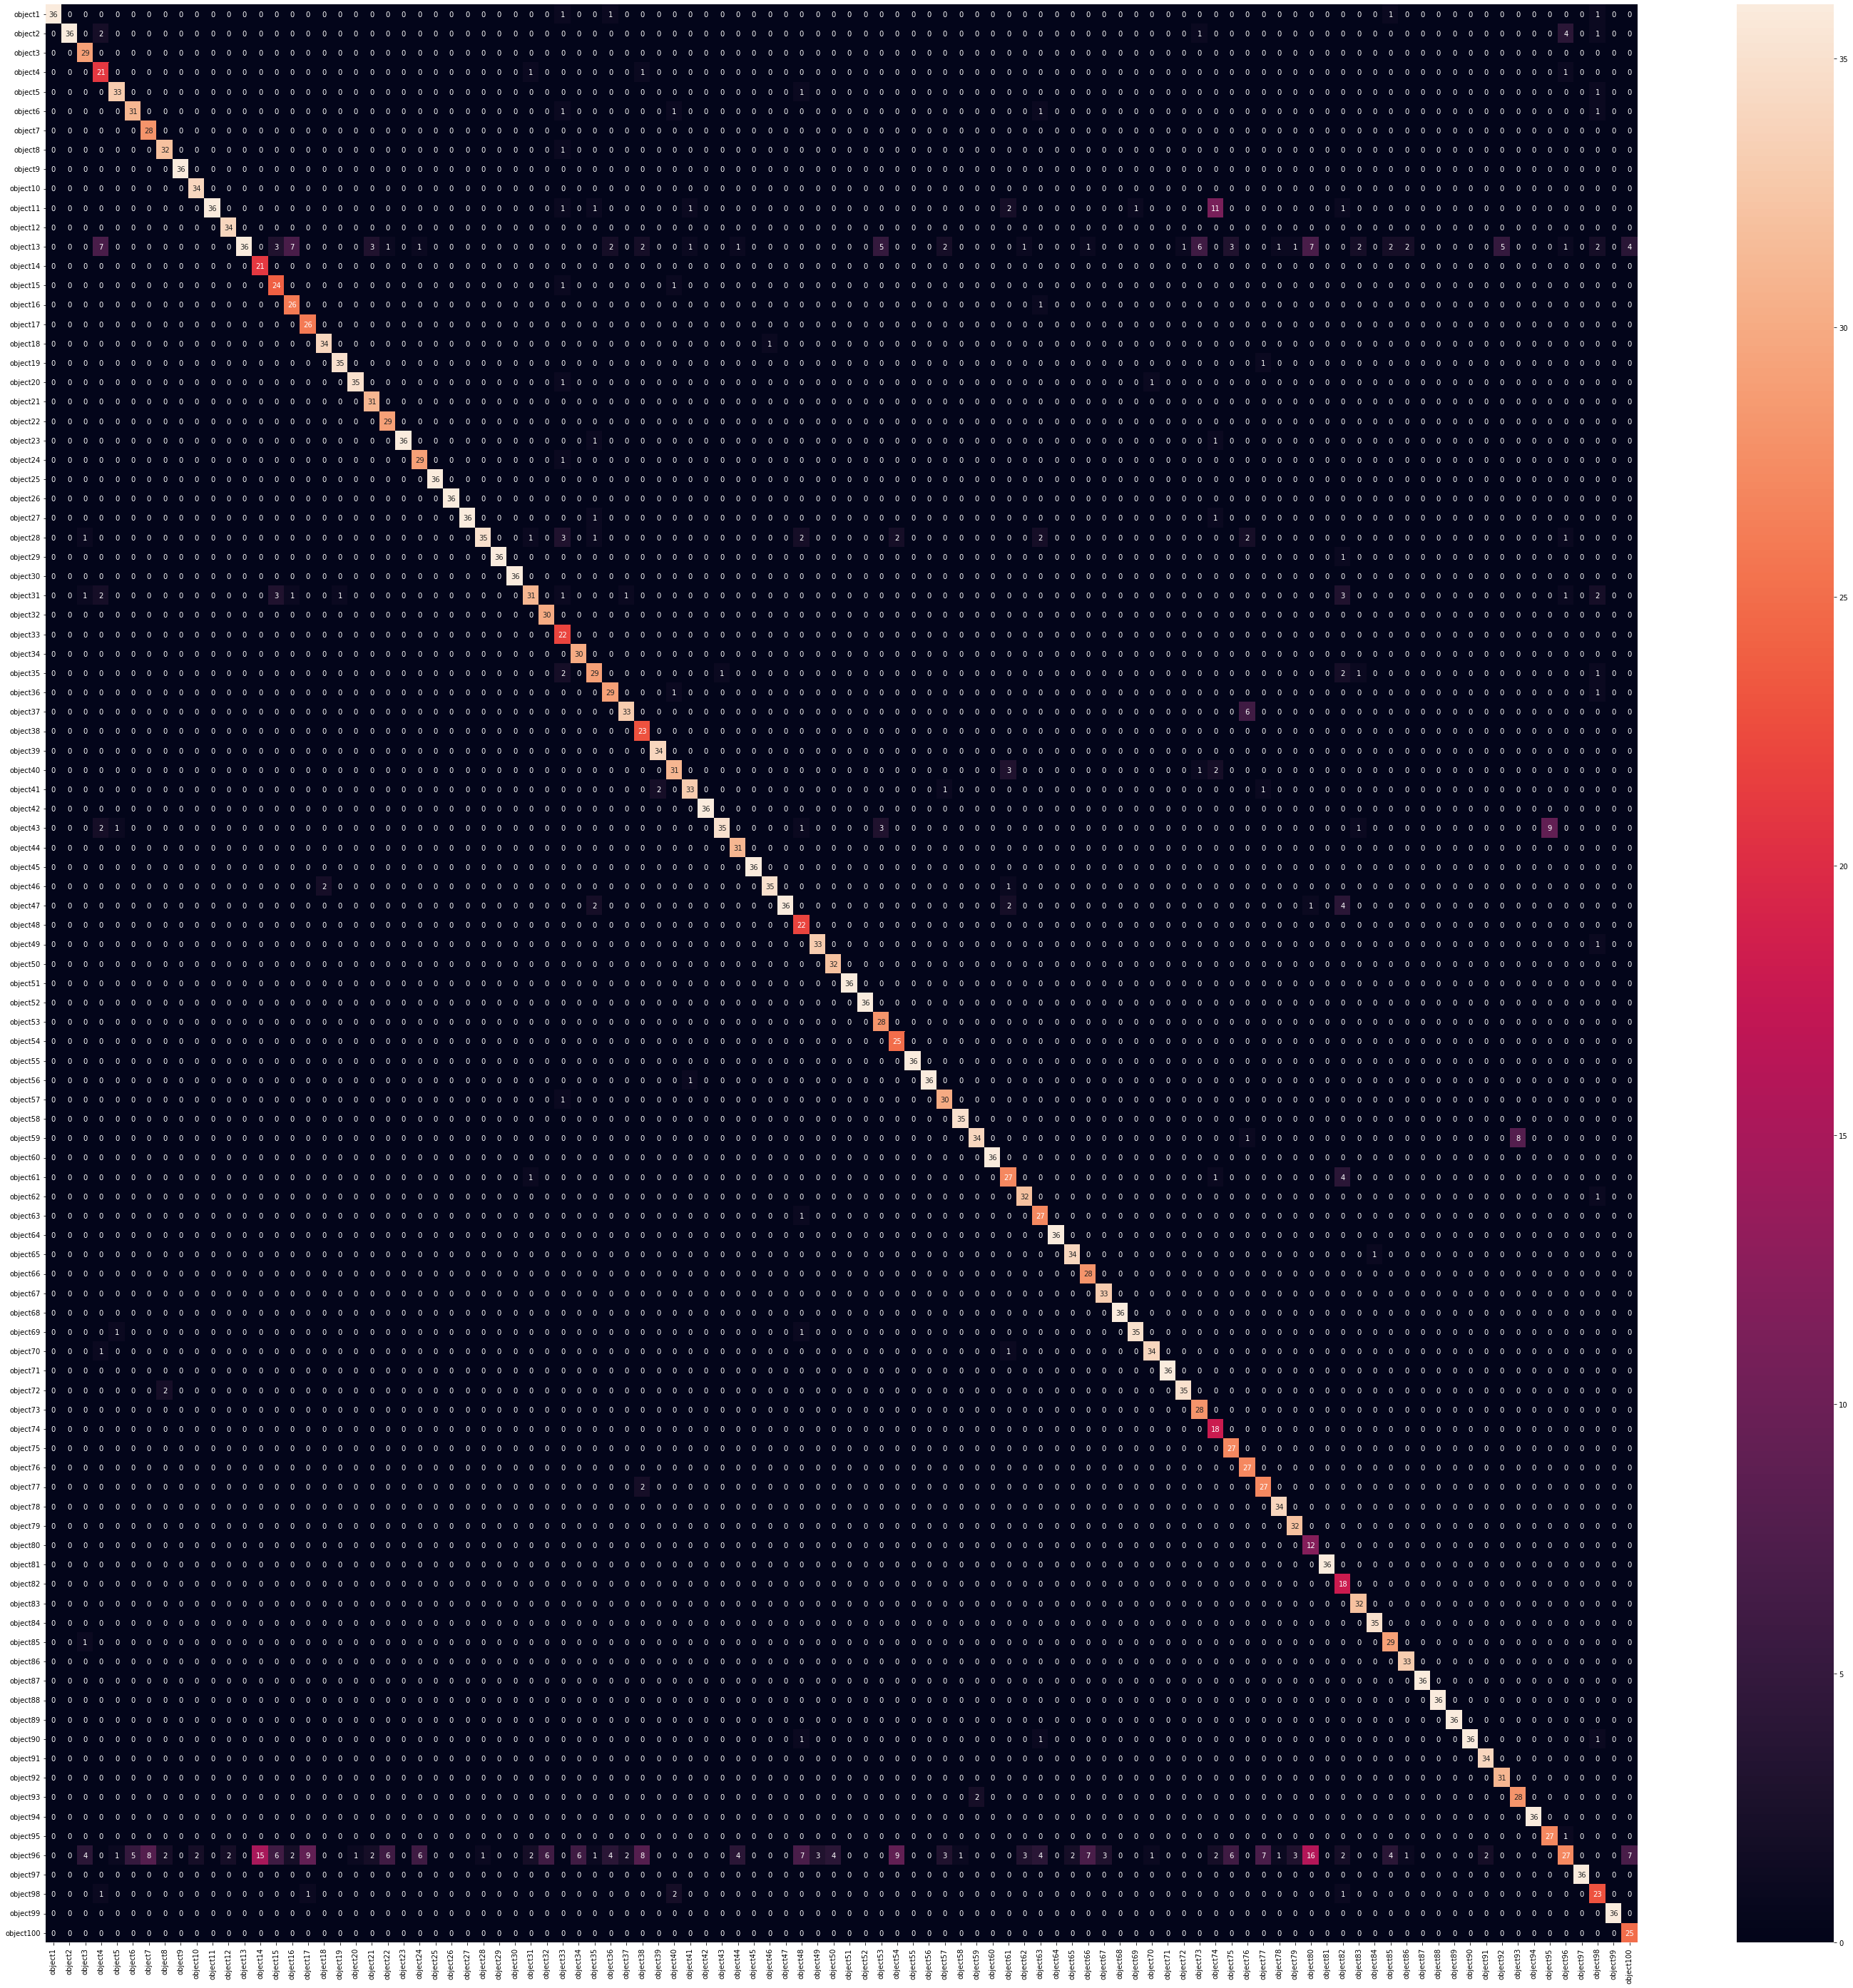

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df_cfm = pd.DataFrame(cm, index = label, columns =label)
plt.figure(figsize = (50, 50))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("cfm2.pdf")